# Fractal Analysis Of Blood Cancer Tissues Slides

## Importing Dependencies

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from matplotlib import pyplot as plt
from playsound import playsound

## RGB to GrayScale Conversion 

In [2]:
def rgb2gray(img):
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    grayscale = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return grayscale

## Box Counting Function 

In [3]:
def boxcount(img, k):
        S = np.add.reduceat(np.add.reduceat(img, np.arange(0, img.shape[0], k), axis=0),np.arange(0, img.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])

## Fractal Dimension Calculating Function

In [4]:
def fractal_dimension(img, threshold):
    # Only for 2d image
    #checking the condition of image shape 
    assert(len(img.shape) == 2)
    

    # Transform img into a binary array
    binaryimg = (img < threshold)

    # Minimal dimension of image

    p = min(binaryimg.shape)


    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(binaryimg, size))
    
    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]
    

## Main Code - Testing on multiple Images 

In [14]:
i = 1
mn_md_counter = 0
number_img = 3
epochs = 200

# figure, axis = plt.subplots(number_img)

# defining array containg median and means values of imgs
mean_array_maliearly = [0]*number_img
sd_array=[0]*number_img
median_array_maliearly = [0]*number_img
while i != number_img+1 : 
      input_string = "/Users/anujpatel/Documents/datasets/brain tumour/brain_tumor_mri/new_dataset/bt_images/samples/bloodcancer/MalignantProB/malignant"+str(i)+".jpg"
      img = imageio.imread(input_string)
      img = rgb2gray(img)

      #counters and arrays
      j=1
      array = [0]*epochs
      index = 0

      for j in range(76,200) :
        fd = fractal_dimension(img,j)
        array[index]=fd
        index = j



      mean = np.mean(array)
      median = np.median(array)
      sd = np.std(array)
      print(i,"th => ",mean," ",median," ",sd)

      # storing median and mean in PLOT_ARRAY
      if mn_md_counter != number_img:
        mean_array_maliearly[mn_md_counter]=mean
        median_array_maliearly[mn_md_counter]=median
        sd_array[mn_md_counter]=sd
        mn_md_counter+=1
      i+=1
      #playing beep for counting
      playsound('/Users/anujpatel/Documents/datasets/brain tumour/brain_tumor_mri/new_dataset/bt_images/samples/beep.mp3')
#playing DONE sound beeper 
playsound('/Users/anujpatel/Documents/datasets/brain tumour/brain_tumor_mri/new_dataset/bt_images/samples/done.mp3')
      
      

/var/folders/2f/m0xfb_6j03vcc8xdz8hp1d100000gn/T/ipykernel_17444/1388005986.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(input_string)


1 th =>  0.5742455345242383   0.7609701036951602   0.4625185434620171
2 th =>  0.5636983804428678   0.8269118231816934   0.44987494004973255
3 th =>  0.6000177711558493   0.9240137272513936   0.4754291883332302


## Ploting the graph 

This graph is providing the relation between the Fractal Dimesion and Binary Image Conversion Thresold

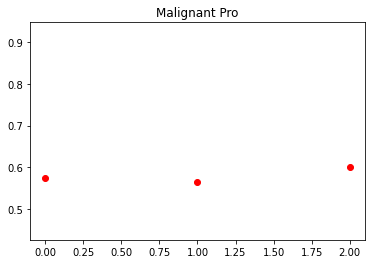

In [15]:
from turtle import color
i=1
number_img=3
y = [0]*number_img
while i!=number_img:
  y[i] = i
  i+=1

plt.title("Malignant Pro")
# 1
plt.scatter(y, mean_array_maliearly, color="red")
# 2
plt.scatter(y, median_array_maliearly, color="white",alpha=0.1)
# 3
plt.plot(y, sd_array, color="white",alpha=0.1)

plt.show()

## Benign


In [16]:
i = 1
mn_md_counter = 0
number_img = 3
epochs = 200

# figure, axis = plt.subplots(number_img)

# defining array containg median and means values of imgs
mean_array_b = [0]*number_img
sd_array_b=[0]*number_img
median_array_b = [0]*number_img
while i != number_img+1 : 
      input_string = "/Users/anujpatel/Documents/datasets/brain tumour/brain_tumor_mri/new_dataset/bt_images/samples/bloodcancer/Benign/benign"+str(i)+".jpg"
      img = imageio.imread(input_string)
      img = rgb2gray(img)

      #counters and arrays
      j=1
      array = [0]*epochs
      index = 0

      for j in range(76,200) :
        fd = fractal_dimension(img,j)
        array[index]=fd
        index = j



      mean = np.mean(array)
      median = np.median(array)
      sd = np.std(array)
      print(i,"th => ",mean," ",median," ",sd)

      # storing median and mean in PLOT_ARRAY
      if mn_md_counter != number_img:
        mean_array_b[mn_md_counter]=mean
        median_array_b[mn_md_counter]=median
        sd_array_b[mn_md_counter]=sd
        mn_md_counter+=1
      i+=1
      #playing beep for counting
      #playsound('/Users/anujpatel/Documents/datasets/brain tumour/brain_tumor_mri/new_dataset/bt_images/samples/beep.mp3')

#playing DONE sound beeper 
playsound('/Users/anujpatel/Documents/datasets/brain tumour/brain_tumor_mri/new_dataset/bt_images/samples/done.mp3')
      
      

/var/folders/2f/m0xfb_6j03vcc8xdz8hp1d100000gn/T/ipykernel_17444/4115486480.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(input_string)


1 th =>  0.6508994713891083   1.0588395218989146   0.5172428368041851
2 th =>  0.637221977169522   0.9909154095307742   0.5013000318733356
3 th =>  0.7022065582216013   1.0806856725324239   0.5604542098916397


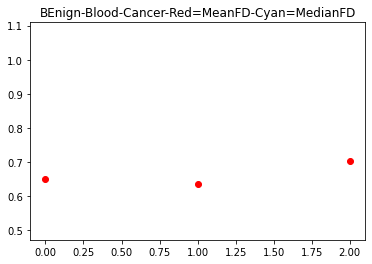

In [17]:
i=1
y = [0]*number_img
while i!=number_img:
  y[i] = i
  i+=1

plt.title("BEnign-Blood-Cancer-Red=MeanFD-Cyan=MedianFD")
# 2
plt.plot(y, median_array_b, color="white",alpha=0.1)
# 1
plt.scatter(y, mean_array_b, color="red")
# 3 
plt.plot(y, sd_array_b, color="white",alpha=0.1)

plt.show()

## malignant pre

In [12]:
i = 1
mn_md_counter = 0
number_img = 3
epochs = 200

# figure, axis = plt.subplots(number_img)

# defining array containg median and means values of imgs
mean_array_p = [0]*number_img
sd_array_p=[0]*number_img
median_array_p = [0]*number_img
while i != number_img+1 : 
      input_string = "/Users/anujpatel/Documents/Fractals/samples/bloodcancer/MalignantPreB/malignant"+str(i)+".jpg"
      img = imageio.imread(input_string)
      img = rgb2gray(img)

      #counters and arrays
      j=1
      array = [0]*epochs
      index = 0

      for j in range(76,200) :
        fd = fractal_dimension(img,j)
        array[index]=fd
        index = j



      mean = np.mean(array)
      median = np.median(array)
      sd = np.std(array)
      print(i,"th => ",mean," ",median," ",sd)

      # storing median and mean in PLOT_ARRAY
      if mn_md_counter != number_img:
        mean_array_p[mn_md_counter]=mean
        median_array_p[mn_md_counter]=median
        sd_array_p[mn_md_counter]=sd
        mn_md_counter+=1
      i+=1
      #playing beep for counting
      #playsound('/Users/anujpatel/Documents/datasets/brain tumour/brain_tumor_mri/new_dataset/bt_images/samples/beep.mp3')

#playing DONE sound beeper 
playsound('/Users/anujpatel/Documents/datasets/brain tumour/brain_tumor_mri/new_dataset/bt_images/samples/done.mp3')
      
      

/var/folders/2f/m0xfb_6j03vcc8xdz8hp1d100000gn/T/ipykernel_17444/3071607045.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(input_string)


1 th =>  0.5834252160465536   0.779336439797884   0.4830743565095377
2 th =>  0.6106136543086781   0.7759502622514964   0.5137862641551583
3 th =>  0.6455484443182078   0.8925091021318698   0.5339805999477578


## Benign vs Malignant 

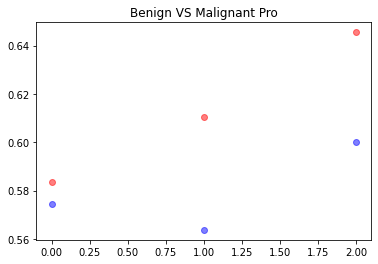

In [13]:
i=1
number_img1 = 3
number_img2 = 3
y1 = [0]*number_img1
while i!=number_img1:
  y1[i] = i
  i+=1
j=1
y2 = [0]*number_img2
while j!=number_img2:
  y2[j] = j
  j+=1

plt.title("Benign VS Malignant Pro")

plt.scatter(y2, mean_array_b, color="red",alpha=0.5)
# 3 
plt.scatter(y1, mean_array_maliearly, color="blue",alpha=0.5)

plt.show()

In [50]:


j=1
array = [0]*epochs
index = 0
epochs = 200
img = cv2.imread("/Users/anujpatel/Documents/Fractals/samples/sin.png")
gry = rgb2gray(img)
for j in range(10,200) :
    fd = fractal_dimension(gry,j)
    array[index]=fd
    index = j


mean = np.mean(array)
median = np.median(array)
sd = np.std(array)
print(i,"th => ",mean," ",median," ",sd)
      

3 th =>  1.1015746146593162   1.1393270731417338   0.2878145418848518


In [51]:


j=1
array = [0]*epochs
index = 0
epochs = 200
img = cv2.imread("/Users/anujpatel/Documents/Fractals/samples/cos.png")
gry = rgb2gray(img)
for j in range(10,200) :
    fd = fractal_dimension(gry,j)
    array[index]=fd
    index = j


mean = np.mean(array)
median = np.median(array)
sd = np.std(array)
print(i,"th => ",mean," ",median," ",sd)
      

3 th =>  1.103016851973712   1.1401510407256836   0.2867299967849991


In [52]:


j=1
array = [0]*epochs
index = 0
epochs = 200
img = cv2.imread("/Users/anujpatel/Documents/Fractals/samples/tan.png")
gry = rgb2gray(img)
for j in range(10,200) :
    fd = fractal_dimension(gry,j)
    array[index]=fd
    index = j


mean = np.mean(array)
median = np.median(array)
sd = np.std(array)
print(i,"th => ",mean," ",median," ",sd)
      

3 th =>  1.1384377998210597   1.228475660380349   0.30322049194311296


In [53]:


j=1
array = [0]*epochs
index = 0
epochs = 200
img = cv2.imread("/Users/anujpatel/Documents/Fractals/samples/cot.png")
gry = rgb2gray(img)
for j in range(10,200) :
    fd = fractal_dimension(gry,j)
    array[index]=fd
    index = j


mean = np.mean(array)
median = np.median(array)
sd = np.std(array)
print(i,"th => ",mean," ",median," ",sd)
      

3 th =>  1.1421366604175436   1.2331458806696152   0.3028491608285519


In [54]:


j=1
array = [0]*epochs
index = 0
epochs = 200
img = cv2.imread("/Users/anujpatel/Documents/Fractals/samples/sec.png")
gry = rgb2gray(img)
for j in range(10,200) :
    fd = fractal_dimension(gry,j)
    array[index]=fd
    index = j


mean = np.mean(array)
median = np.median(array)
sd = np.std(array)
print(i,"th => ",mean," ",median," ",sd)
      

3 th =>  1.1301627383131454   1.1971112944446003   0.29718829650432


In [55]:


j=1
array = [0]*epochs
index = 0
epochs = 200
img = cv2.imread("/Users/anujpatel/Documents/Fractals/samples/csc.png")
gry = rgb2gray(img)
for j in range(10,200) :
    fd = fractal_dimension(gry,j)
    array[index]=fd
    index = j


mean = np.mean(array)
median = np.median(array)
sd = np.std(array)
print(i,"th => ",mean," ",median," ",sd)
      

3 th =>  1.1320081144200855   1.202663864379125   0.2974586715396363



y=mx+c changes wrt fd


In [57]:


j=1
array = [0]*epochs
index = 0
epochs = 200
img = cv2.imread("/Users/anujpatel/Documents/Fractals/samples/cos.png")
gry = rgb2gray(img)
for j in range(10,200) :
    fd = fractal_dimension(gry,j)
    array[index]=fd
    index = j


mean = np.mean(array)
median = np.median(array)
sd = np.std(array)
print(i,"th => ",mean," ",median," ",sd)
      

3 th =>  1.103016851973712   1.1401510407256836   0.2867299967849991


In [58]:


j=1
array = [0]*epochs
index = 0
epochs = 200
img = cv2.imread("/Users/anujpatel/Documents/Fractals/samples/cos2.png")
gry = rgb2gray(img)
for j in range(10,200) :
    fd = fractal_dimension(gry,j)
    array[index]=fd
    index = j


mean = np.mean(array)
median = np.median(array)
sd = np.std(array)
print(i,"th => ",mean," ",median," ",sd)
      

3 th =>  1.0990533504264053   1.1364486513990866   0.286973531086159


In [59]:


j=1
array = [0]*epochs
index = 0
epochs = 200
img = cv2.imread("/Users/anujpatel/Documents/Fractals/samples/2cos.png")
gry = rgb2gray(img)
for j in range(10,200) :
    fd = fractal_dimension(gry,j)
    array[index]=fd
    index = j


mean = np.mean(array)
median = np.median(array)
sd = np.std(array)
print(i,"th => ",mean," ",median," ",sd)
      

3 th =>  1.1081919624936818   1.1379775333512856   0.2912837776369793


In [60]:


j=1
array = [0]*epochs
index = 0
epochs = 200
img = cv2.imread("/Users/anujpatel/Documents/Fractals/samples/4cos.png")
gry = rgb2gray(img)
for j in range(10,200) :
    fd = fractal_dimension(gry,j)
    array[index]=fd
    index = j


mean = np.mean(array)
median = np.median(array)
sd = np.std(array)
print(i,"th => ",mean," ",median," ",sd)
      

3 th =>  1.1448583053558563   1.2355961812279543   0.3041670013269047


In [61]:


j=1
array = [0]*epochs
index = 0
epochs = 200
img = cv2.imread("/Users/anujpatel/Documents/Fractals/samples/0.5cos.png")
gry = rgb2gray(img)
for j in range(10,200) :
    fd = fractal_dimension(gry,j)
    array[index]=fd
    index = j


mean = np.mean(array)
median = np.median(array)
sd = np.std(array)
print(i,"th => ",mean," ",median," ",sd)
      

3 th =>  1.0884887322726944   1.1317208538933363   0.2851868549530319


In [62]:


j=1
array = [0]*epochs
index = 0
epochs = 200
img = cv2.imread("/Users/anujpatel/Documents/Fractals/samples/0.1cos.png")
gry = rgb2gray(img)
for j in range(10,200) :
    fd = fractal_dimension(gry,j)
    array[index]=fd
    index = j


mean = np.mean(array)
median = np.median(array)
sd = np.std(array)
print(i,"th => ",mean," ",median," ",sd)
      

3 th =>  1.0735167318257453   1.1042187425402203   0.278987438727288


In [63]:
import cv2
import mediapipe as mp
import pyautogui
cap = cv2.VideoCapture(0)
hand_detector = mp.solutions.hands.Hands()
drawing_utils = mp.solutions.drawing_utils
screen_width, screen_height = pyautogui.size()
index_y = 0
while True:
    _, frame = cap.read()
    frame = cv2.flip(frame, 1)
    frame_height, frame_width, _ = frame.shape
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    output = hand_detector.process(rgb_frame)
    hands = output.multi_hand_landmarks
    if hands:
        for hand in hands:
            drawing_utils.draw_landmarks(frame, hand)
            landmarks = hand.landmark
            for id, landmark in enumerate(landmarks):
                x = int(landmark.x*frame_width)
                y = int(landmark.y*frame_height)
                if id == 8:
                    cv2.circle(img=frame, center=(x,y), radius=10, color=(0, 255, 255))
                    index_x = screen_width/frame_width*x
                    index_y = screen_height/frame_height*y

                if id == 4:
                    cv2.circle(img=frame, center=(x,y), radius=10, color=(0, 255, 255))
                    thumb_x = screen_width/frame_width*x
                    thumb_y = screen_height/frame_height*y
                    print('outside', abs(index_y - thumb_y))
                    if abs(index_y - thumb_y) < 20:
                        pyautogui.click()
                        pyautogui.sleep(1)
                    elif abs(index_y - thumb_y) < 100:
                        pyautogui.moveTo(index_x, index_y)
    cv2.imshow('Virtual Mouse', frame)
    cv2.waitKey(1)

objc[17444]: Class CaptureDelegate is implemented in both /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x141e52490) and /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x132ac8860). One of the two will be used. Which one is undefined.
objc[17444]: Class CVWindow is implemented in both /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x141e524e0) and /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x127ff0a68). One of the two will be used. Which one is undefined.
objc[17444]: Class CVView is implemented in both /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x141e52508) and /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mediapipe/.dylibs/libopenc

outside 748.125
outside 5.833333333333371
outside 36.458333333333314
outside 193.95833333333331
outside 258.125
outside 65.625
outside 166.25
outside 75.83333333333337
outside 118.125
outside 88.95833333333337
outside 110.83333333333337
outside 107.91666666666663
outside 110.83333333333337
outside 105.0
outside 99.16666666666674
outside 97.70833333333326
outside 78.75
outside 99.16666666666663
outside 102.08333333333337
outside 75.83333333333337
outside 75.83333333333337
outside 49.58333333333337
outside 81.66666666666674
outside 105.0
outside 80.20833333333326
outside 75.83333333333326
outside 91.875
outside 97.70833333333337
outside 100.625
outside 27.70833333333337
outside 382.08333333333337
outside 116.66666666666663
outside 48.125
outside 167.70833333333326
outside 320.83333333333337
outside 377.70833333333326
outside 376.24999999999994
outside 370.41666666666663
outside 363.12499999999994
outside 377.7083333333333
outside 382.08333333333337
outside 387.9166666666667
outside 392.2

KeyboardInterrupt: 

: 